In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

a=api.dataset_download_files('uom190346a/disease-symptoms-and-patient-profile-dataset')
# KaggleApi를 통해 uom190346a/disease-symptoms-and-patient-profile-dataset을 불러온다.
# url: https://www.kaggle.com/code/rospel/basic-medical-info-a-key-to-predict-disease


In [2]:
import zipfile

zip_path = 'C:/Users/user/Desktop/final_ossproject/ossproject-disease_symptom/disease-symptoms-and-patient-profile-dataset.zip'  # 압축 파일 경로
extract_path = 'C:/Users/user/Desktop/final_ossproject/ossproject-disease_symptom'  # 압축 해제 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/user/Desktop/final_ossproject/ossproject-disease_symptom/Disease_symptom_and_patient_profile_dataset.csv') # csv형식의 데이터셋 읽기
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

In [5]:
print(sum(df.Disease.value_counts() >= 1))
print(sum(df.Disease.value_counts() == 1))

116
61


In [6]:
print(sum(df.Disease.value_counts() > 9))
print(sum(df.Disease.value_counts() <= 9))

6
110


In [7]:
df = df[df.groupby('Disease')['Disease'].transform('size') >= 10]
# DataFrame을 'Disease' 열로 그룹화하고 각 그룹의 크기(발생 횟수)를 계산하고 그룹 크기가 10 이상인 그룹에서만 행을 선택
df.shape

(83, 10)

In [8]:
df.isna().sum() #데이터프레임의 널값 개수 확인

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [9]:
df.loc[df.duplicated()] #중복된 행 찾아내기

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
59,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative
76,Asthma,Yes,Yes,No,Yes,35,Male,Normal,Normal,Positive
123,Asthma,Yes,Yes,No,Yes,40,Female,Normal,Normal,Positive
126,Asthma,Yes,No,Yes,Yes,40,Male,Normal,High,Positive
182,Asthma,Yes,Yes,No,Yes,45,Male,Normal,Normal,Positive
267,Osteoporosis,Yes,No,Yes,No,55,Female,Normal,Normal,Positive
284,Osteoporosis,No,Yes,No,No,60,Male,High,High,Negative
308,Stroke,Yes,No,Yes,No,65,Female,High,Low,Negative


In [10]:
df = df.drop_duplicates().reset_index(drop= True) # 중복된 행을 삭제하고 인덱스 리셋
df.shape

(69, 10)

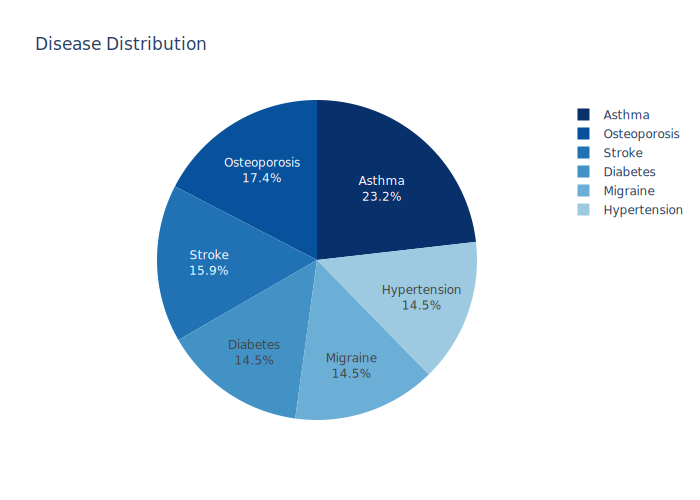

In [11]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"

disease_counts = df['Disease'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']
#df에서 각 질병의 발생 빈도를 계산하고, 결과를 'Disease' 및 'Count' 열을 가진 새로운 DataFrame으로 정리

fig = px.pie(disease_counts, 
             values= 'Count', 
             names= 'Disease', 
             color_discrete_sequence= px.colors.sequential.Blues_r, 
             title= 'Disease Distribution') #각 질병의 발생 빈도를 나타내는 파이 차트 생성

fig.update_traces(textinfo='percent+label') #각 파이 차트 섹션에 백분율+라벨을 함께 표시

fig.show(renderer="svg")
# fig.show()

In [12]:
dicc = {'Yes':1, 'No':0, 'Low':1, 'Normal':2, 'High':3, 'Positive':1, 'Negative':0, 'Male':0, 'Female': 1}
def replace(x, dicc= dicc): # 주어진 값이 사전에 있는 경우 해당 값을 사전의 값으로 대체
    if x in dicc:
        x = dicc[x]
    return x
df = df.applymap(replace) #DataFrame의 모든 원소에 대해 replace 함수를 적용
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Asthma,1,1,0,1,25,0,2,2,1
1,Asthma,1,0,0,1,28,0,3,2,1
2,Diabetes,0,0,0,0,29,0,1,2,0
3,Stroke,1,1,1,1,29,1,2,2,1
4,Migraine,1,0,0,0,30,1,2,2,0


In [13]:
df.dtypes

Disease                 object
Fever                    int64
Cough                    int64
Fatigue                  int64
Difficulty Breathing     int64
Age                      int64
Gender                   int64
Blood Pressure           int64
Cholesterol Level        int64
Outcome Variable         int64
dtype: object

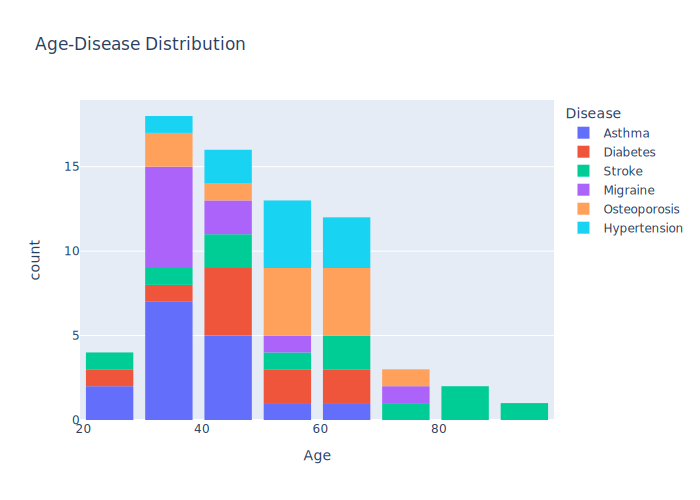

In [14]:
fig = px.histogram(df, 
             x = 'Age',  
             title='Age-Disease Distribution',
             color= 'Disease' # 질병에 따라 다른 색상으로 구분
                  ) #나이에 따른 질병 분포 히스토그램 그래프로 시각화
fig.update_layout(bargap=0.2) #막대간격 0.2

fig.show(renderer="svg")

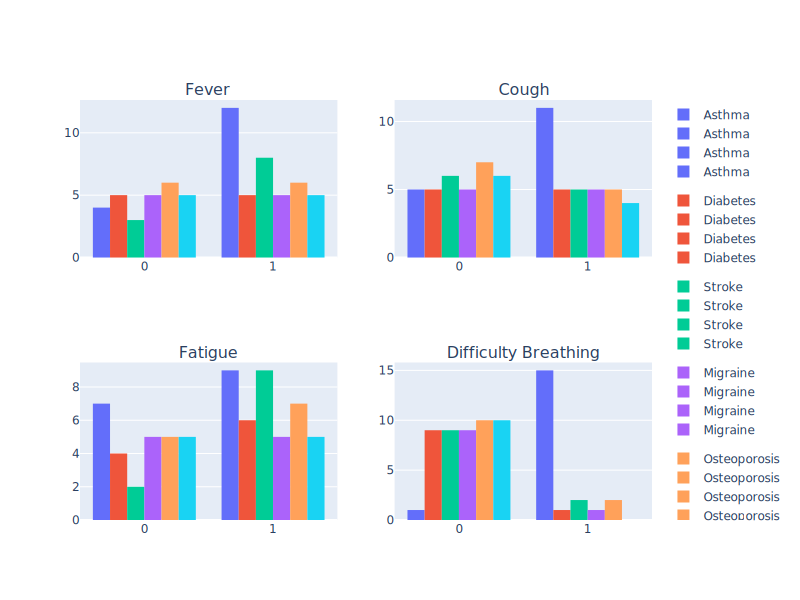

In [15]:
import plotly.subplots as sp

def subplots(df, columns):
    fig = sp.make_subplots(rows=2, cols=2, subplot_titles= columns)
    #2x2의 서브플롯을 생성하고, 각 서브플롯의 제목은 지정된 열의 이름으로 설정
    for idx, column in enumerate(columns): #주어진 열들에 대해 반복하면서 각 열에 대한 히스토그램을 생성
        i = idx // 2 + 1 
        j = idx % 2 + 1  
        fig_express = px.histogram(df, x=column, title=column + '-Disease Distribution', color='Disease')
        # Plotly Express를 사용하여 현재 열에 대한 히스토그램을 생성
        for trace in fig_express.data: #생성된 히스토그램의 각 트레이스를 서브플롯에 추가
            fig.add_trace(trace, row=i, col=j)
    fig.update_layout(height=600, width=800, title_text="")     
    #전체 레이아웃을 설정하고, 높이와 너비를 조정하며 전체 제목을 비움
    fig.show(renderer="svg")

subplots(df, df.columns[1:5])

In [16]:
print(df.Disease)

0       Asthma
1       Asthma
2     Diabetes
3       Stroke
4     Migraine
        ...   
64    Migraine
65      Stroke
66      Stroke
67      Stroke
68      Stroke
Name: Disease, Length: 69, dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Disease = le.fit_transform(df.Disease) #레이블 인코더를 피팅하고 Disease열 반환
df.head()
#범주형 데이터 -> 수치형 데이터로 변환

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,0,1,1,0,1,25,0,2,2,1
1,0,1,0,0,1,28,0,3,2,1
2,1,0,0,0,0,29,0,1,2,0
3,5,1,1,1,1,29,1,2,2,1
4,3,1,0,0,0,30,1,2,2,0


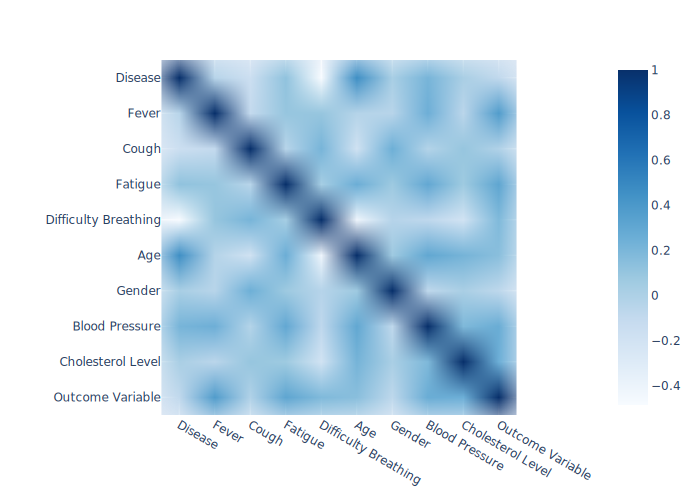

In [18]:
corr_df = df.corr()
fig = px.imshow(corr_df, color_continuous_scale= px.colors.sequential.Blues)
fig.show(renderer="svg")
 #각 열 간의 상관관계 시각화

In [19]:
df.head
print(df.columns)

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#데이터 준비
X = df.drop(['Disease'], axis= 1).values
y = df.Disease.values

#훈련 및 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.4, shuffle= True, stratify= y, random_state=30)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size= 0.5, shuffle= True, stratify= y_val, random_state=30)

#모델 정의
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

#모델 훈련
knn_pipe.fit(X_train, y_train)

#검증 데이터 예측
yknn_pred = knn_pipe.predict(X_val)

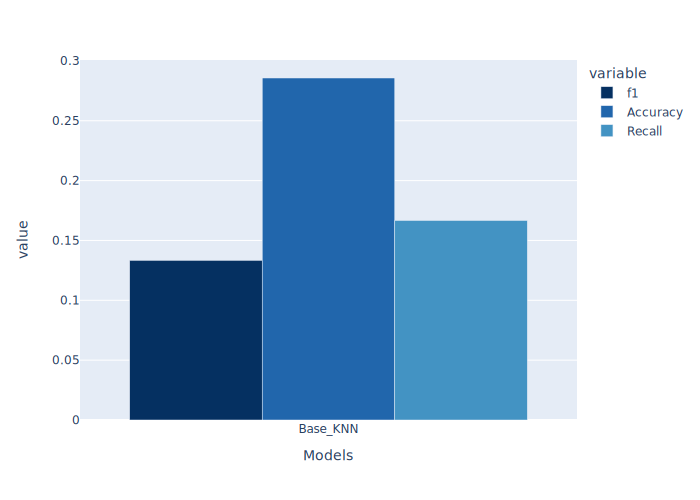

In [21]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
models = ['Base_KNN']

f1 = [f1_score(y_val, yknn_pred, average= 'macro', zero_division= 0)]
#검증 데이터에 대한 F1 score
accuracy = [accuracy_score(y_val, yknn_pred)] #검증 데이터에 대한 정확도 계산
recall = [recall_score(y_val, yknn_pred, average= 'macro')] #검증 데이터에 대한 recall 계산

metrics_df = pd.DataFrame({'Models': models, 'f1': f1, 'Accuracy': accuracy, 'Recall': recall})
#계산된 성능지표를 데이터프레임으로 정리

fig = px.bar(metrics_df, x='Models', y= ['f1', 'Accuracy', 'Recall'], barmode= 'group', color_discrete_sequence= px.colors.sequential.RdBu_r)
# 'Base_KNN' 모델에 대한 F1 score, accuracy, recall을 시각적으로 비교
fig.show(renderer="svg")

In [22]:
y_pred_test = knn_pipe.predict(X_test) # 테스트 데이터를 사용하여 최적 모델로 예측 수행
print('Test score with best model: ', f1_score(y_test, y_pred_test, average= 'macro', zero_division= 0))
# F1 점수 계산 (macro 평균 사용)을 통한 테스트 세트에서의 모델 평가

Test score with best model:  0.40277777777777773


In [23]:
import pandas as pd

# 테스트 데이터프레임 생성
X_test_df = pd.DataFrame(X_test)
# 예측 결과 및 실제 결과 역변환 후 데이터프레임 생성
df = pd.DataFrame({'actual': le.inverse_transform(y_test), 'predicted': le.inverse_transform(y_pred_test)})

# 테스트 데이터와 결과 데이터프레임을 인덱스를 기준으로 합침
df = df.set_index(X_test_df.index)
df = pd.concat([X_test_df, df], axis=1)

# 예측이 잘못된 데이터 필터링
misclassified = df[df['actual'] != df['predicted']]
# 잘못 예측된 데이터 출력
print(misclassified)

    0  1  2  3   4  5  6  7  8        actual     predicted
1   1  1  1  0  35  1  3  2  0  Hypertension      Migraine
2   1  0  1  0  55  1  2  2  1  Osteoporosis  Hypertension
4   1  0  1  0  45  1  3  3  1      Diabetes  Hypertension
6   0  0  1  0  45  0  2  2  0        Stroke      Diabetes
8   0  1  1  0  35  0  3  3  1      Migraine  Osteoporosis
10  1  1  0  0  52  0  2  1  0  Hypertension        Asthma
11  1  0  1  1  55  0  3  1  1  Osteoporosis  Hypertension
13  0  0  0  1  31  0  1  2  0  Osteoporosis        Asthma
